## 🌍 Task 3: Cross-Country Solar Potential Comparison

Synthesize the cleaned datasets from Benin, Sierra Leone, and Togo to identify relative solar potential and key differences across countries.

## Imports

In [1]:
import sys
sys.path.append('../../scripts')
from compare_countries import ComparisonHandler

In [2]:
DYNAMIC_FILE_PATHS = {
    'Benin': '../../data/benin/benin_clean.csv',
    'Sierra Leone': '../../data/sierra-leone/sierra_leone_clean.csv',
    'Togo': '../../data/togo/togo_clean.csv'
}

try:
    comparison_handler = ComparisonHandler(file_paths=DYNAMIC_FILE_PATHS)
    print("✅ ComparisonHandler instantiated successfully.")
except ValueError as e:
    print(f"!!! ERROR: {e}")

✅ ComparisonHandler instantiated successfully.


### 1. Load Data AND Concatenate all DataFrames
Load each country’s cleaned CSV and combine into a single DataFrame.

In [3]:
# 1. Run the data loading and combining logic
print("--- STARTING DATA LOADING ---")
loading_successful = comparison_handler.load_and_combine_data()

# 2. Make the combined DataFrame easily accessible in the notebook
if loading_successful:
    df_combined = comparison_handler.df_combined
    print("\n✅ Data loading complete.")
    print("The combined DataFrame is now accessible as **comparison_handler.df_combined** or **df_combined**.")
else:
    print("\n Data loading failed. Check file paths and previous error messages.")

--- STARTING DATA LOADING ---
Loading cleaned datasets for cross-country comparison...
✅ Loaded Benin with 246878 rows.
✅ Loaded Sierra Leone with 238872 rows.
✅ Loaded Togo with 268215 rows.

Total combined rows: 753965
--------------------------------------------------
Combined Data Head:
             Timestamp   GHI  DNI   DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 06:54:00  16.7  0.0  16.5  16.1  16.3  24.2  98.8  0.0     0.0   
1  2021-08-09 06:55:00  18.2  0.1  18.0  17.4  17.6  24.2  98.8  0.0     0.0   
2  2021-08-09 06:56:00  19.7  0.3  19.5  18.7  18.9  24.2  98.8  0.0     0.0   
3  2021-08-09 06:57:00  21.1  0.6  20.9  19.9  20.1  24.2  98.9  0.0     0.0   
4  2021-08-09 06:58:00  22.5  1.1  22.2  21.1  21.3  24.2  98.9  0.0     0.0   

   WSstdev   WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB Country  
0      0.0  0.0      0.0  997         0            0.0   24.2   23.7   Benin  
1      0.0  0.0      0.0  997         0            0.0   24.3   23.8 

### 2. Metric Comparison - Boxplots
Boxplots of GHI, DNI, DHI side-by-side (one plot per metric, colored by country).

--- GENERATING METRIC BOX PLOTS (GHI, DNI, DHI) ---

--- Generating Boxplots for GHI, DNI, and DHI comparison ---


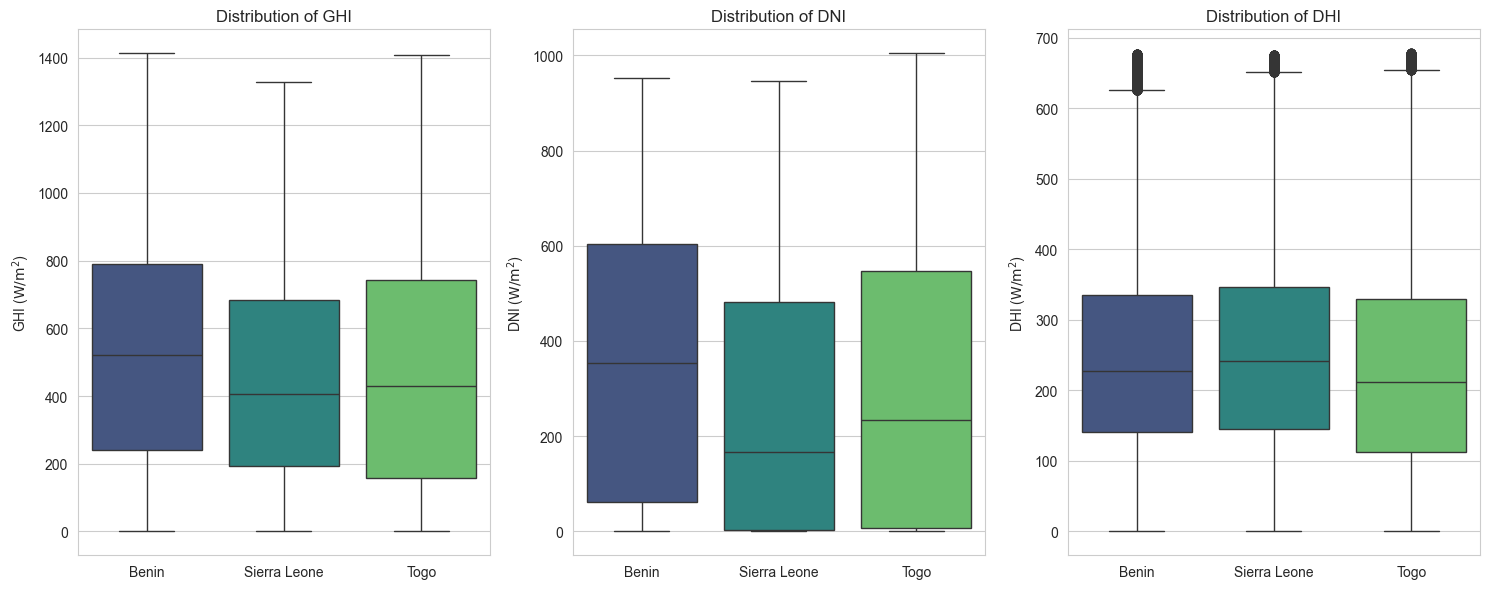


✅ Box plots generated (filtered for daytime: GHI/DNI/DHI > 1).


In [4]:
# Run the boxplot generation logic
print("--- GENERATING METRIC BOX PLOTS (GHI, DNI, DHI) ---")
comparison_handler.generate_boxplots()
print("\n✅ Box plots generated (filtered for daytime: GHI/DNI/DHI > 1).")

### 3. Metric Comparison - Summary Table
Summary Table comparing mean, median, and standard deviation of GHI, DNI, and DHI across countries.

In [5]:
# Run the summary table generation logic
print("--- GENERATING SUMMARY STATISTICS TABLE ---")
comparison_handler.generate_summary_table()
print("\n✅ Summary table calculated and printed (filtered for daytime: GHI > 1).")


--- GENERATING SUMMARY STATISTICS TABLE ---

--- Generating Summary Table for GHI, DNI, and DHI ---
                 GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         513.46  520.0  303.92  356.78  353.0  279.03  247.17  227.8   
Sierra Leone  443.92  404.8  292.17  255.40  165.7  262.25  250.75  242.2   
Togo          453.92  430.2  317.65  295.93  234.2  282.27  228.19  211.8   

                      
                 std  
Country               
Benin         142.61  
Sierra Leone  139.81  
Togo          149.15  

✅ Summary table calculated and printed (filtered for daytime: GHI > 1).


### 4. Statistical Testing - One-Way ANOVA on GHI
Run a one-way ANOVA on GHI values to assess whether differences between countries are significant.

In [6]:
# Run the statistical analysis logic
print("--- RUNNING STATISTICAL TESTS ON GHI ---")
comparison_handler.run_statistical_tests()
print("\n✅ Statistical tests complete. Check the output above for F-statistic, H-statistic, and p-values.")

--- RUNNING STATISTICAL TESTS ON GHI ---

--- Running Statistical Tests on GHI across countries ---

--- Statistical Testing Results ---
One-way ANOVA: F-statistic = 3745.445, p-value = 0.00000
Kruskal–Wallis: H-statistic = 7842.854, p-value = 0.00000

→ The differences in GHI between countries are statistically **significant** (p < 0.05).

✅ Statistical tests complete. Check the output above for F-statistic, H-statistic, and p-values.


### 5. Key Observations

* The ANOVA and Kruskal–Wallis tests both yielded p < 0.05, confirming that GHI differs significantly between countries.

* Benin shows the highest mean and median GHI (≈ 513 W/m²), suggesting stronger solar irradiance overall, though its standard deviation (≈ 304) indicates noticeable variability.

* Sierra Leone and Togo both have lower average GHI values, with Togo showing slightly higher median irradiance but also the greatest variability, suggesting more fluctuating solar conditions.

### 6. (Bonus) Visual Summary - Average GHI
A small bar chart ranking countries by average GHI.

--- PLOTTING AVERAGE GHI BY COUNTRY ---

--- Plotting Average GHI by Country ---


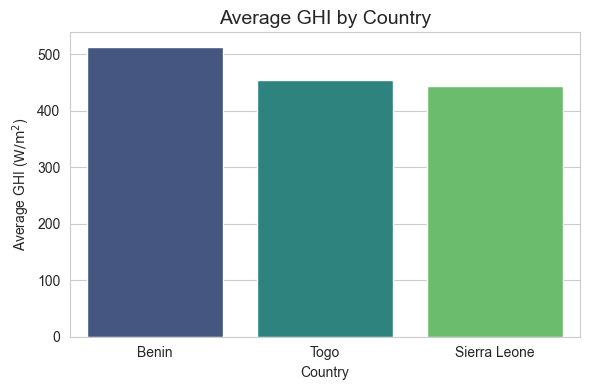


✅ Average GHI bar chart successfully generated.


In [7]:
# Run the bar chart plotting logic
print("--- PLOTTING AVERAGE GHI BY COUNTRY ---")
comparison_handler.plot_average_ghi_bar_chart()
print("\n✅ Average GHI bar chart successfully generated.")